In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
from os import listdir
from os.path import isfile, join

## Choose path and extract files here

In [2]:
path=r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Ne_Test_Loop'
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='NE'
file_fmt='txt'
exclude_str='png'
# If you added a prefix in Witec, e.g. 01, removes when svaing the Ne line name 
prefix=False
Ne_files=pf.get_Ne_files(path=path, ID_str=ID_str, exclude_str=exclude_str, sort=True)

## Fit 1 spectra, and check you are happy with the parameters
- First plot i, and check peak postion. 

1123.096389
1453.279186


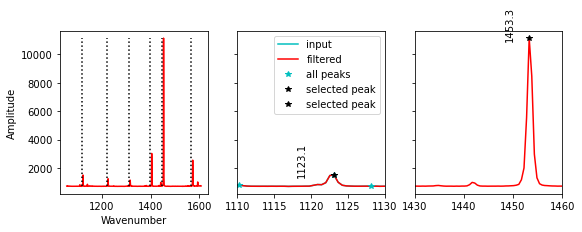

In [9]:
filename=Ne_files[1]  # Or you could put a string here, like 'NE1.txt' 
# You might need to adjust if your spectra is way off
peak1_cent=1123
peak2_cent=1453


Ne, df_sort_Ne_trim, nearest_1117, nearest_1447=pf.plot_Ne_lines(path=path, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## Now tweak the fit for this 1 example
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min)

first iteration, peak Center=1122.8295
first iteration, peak Amplitude=1435.5767
Trying to place second peak between 1117.83and1120.83
Error bars not determined by function


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117
0,NE10.txt,1453.399336,0.00594,1122.833792,NaN,330.565544,0.999734,NaN,NaN,88.129184,9.196205


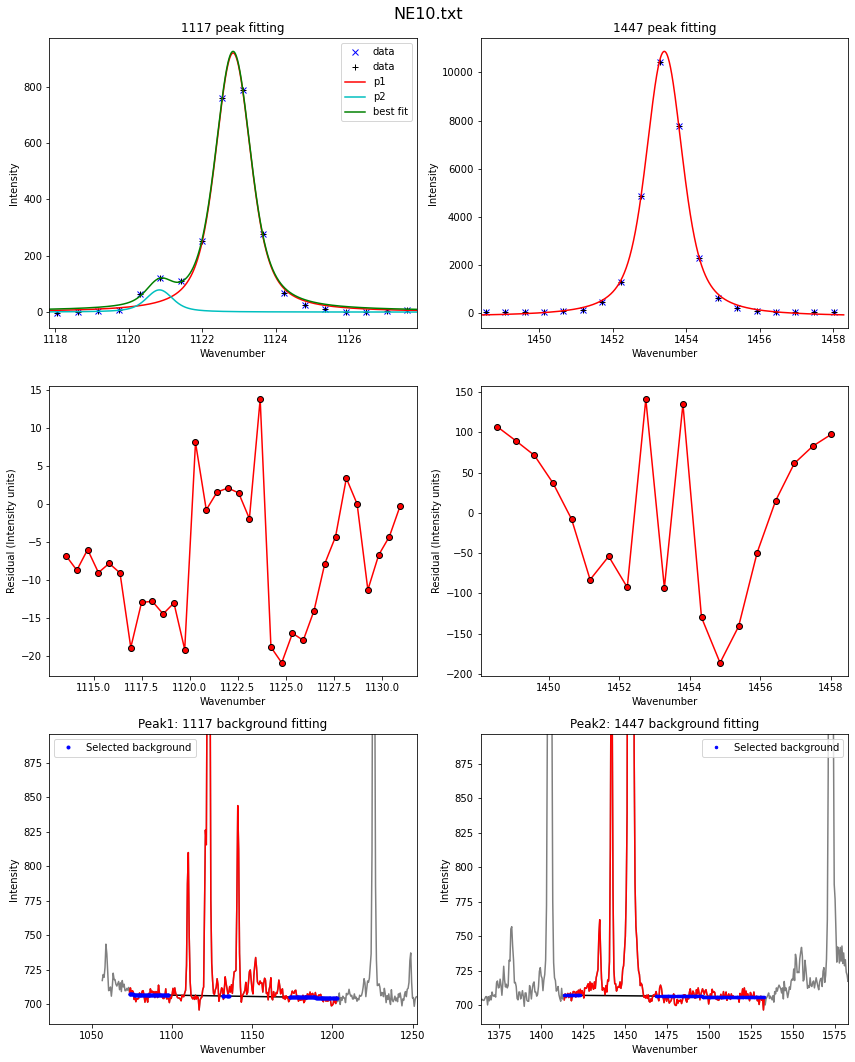

In [13]:
#If you have weak Ne lines and no secondary peak, set to 1
peaks_1=2
# Determines how far from the peak center the 2nd peak is. 
LH_offset_mini=[2, 5]
# If fit really bad, try tweaking the amplitude here
amplitude=100
#x_range - Determins how much outside your selected background position the plot shows
x_range=50
# Y range- Determins how much y axis you get above the baseline on the plot
y_range=200
# Backgrounds, relative to peak center. Adjust in function. 

# To see other parameters you can tweak, do help(pf.fit_Ne_lines) if this isn't working fo your spectra. 
df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(
Ne=Ne, filename=filename, path=path, prefix=prefix,
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1,
Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
amplitude=amplitude, x_range=x_range, y_range=y_range)

df_test


## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [14]:
plot_figure=False # Means doesnt make figures, lot faster. 
save_excel=True # Saves to excel
save_clipboard=True # Copies to clipboard

df = pd.DataFrame([])
for i in range(0, len(Ne_files)):
    
    filename=Ne_files[i]
    Ne=pf.get_data(path=path, filename=filename, filetype=filetype)
    print('working on ' + str(Ne_files[i]))

    data=pf.fit_Ne_lines(Ne=Ne, filename=filename, path=path, prefix=prefix,
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1, Ne_center_1=nearest_1117, Ne_center_2=nearest_1447, amplitude=amplitude, plot_figure=plot_figure, loop=True)

    df = df.append(data)
    
df.to_excel('Ne_Lines_fit_loop.xlsx')
df.to_clipboard(excel=True)



working on NE1.txt
first iteration, peak Center=1122.85
first iteration, peak Amplitude=1369.4191
Trying to place second peak between 1117.85and1120.85
Error bars not determined by function
working on NE10.txt
first iteration, peak Center=1122.8294
first iteration, peak Amplitude=1428.5741
Trying to place second peak between 1117.83and1120.83
Error bars not determined by function
working on NE11.txt
first iteration, peak Center=1122.8233
first iteration, peak Amplitude=1428.7755
Trying to place second peak between 1117.82and1120.82
Error bars not determined by function
working on NE12.txt
first iteration, peak Center=1122.8176
first iteration, peak Amplitude=1416.8247
Trying to place second peak between 1117.82and1120.82
Error bars not determined by function
working on NE13.txt
first iteration, peak Center=1122.8237
first iteration, peak Amplitude=1423.9378
Trying to place second peak between 1117.82and1120.82
Error bars not determined by function
working on NE14.txt
first iteration, p

## Look at residuals to work out if you need to fit some by hand

outliers


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117
0,NE14.txt,1453.400817,0.00576,1122.766220,NaN,330.634597,0.999525,NaN,NaN,88.400109,19.520995
0,NE23.txt,1453.397496,0.00547,1122.771719,NaN,330.625777,0.999552,NaN,NaN,72.470655,14.622162


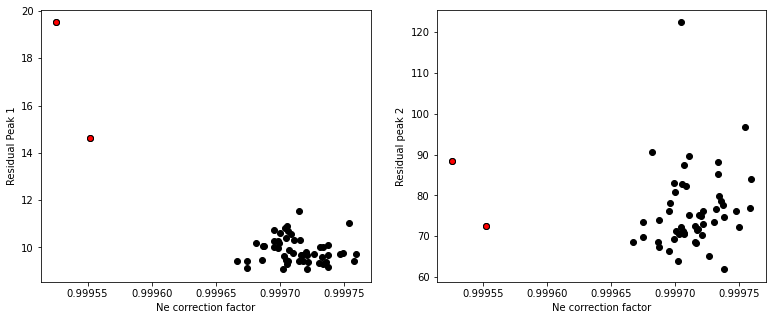

In [15]:
# Identify ones more than x sigma outside the mean of the splitting

Std_split=np.std(df['Ne_Corr'])
Mean_split=np.mean(df['Ne_Corr'])
# How many sigma outside mean splitting you want to consider
sigma=2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
ax1.plot(df['Ne_Corr'], df['residual_1117'], 'ok', mfc='black')
ax2.plot(df['Ne_Corr'], df['residual_1447'], 'ok', mfc='black')
ax1.set_xlabel('Ne correction factor')
ax2.set_xlabel('Ne correction factor')
ax1.set_ylabel('Residual Peak 1')
ax2.set_ylabel('Residual peak 2')



outlier=df.loc[abs(Mean_split-df['Ne_Corr'])>Std_split*2]
ax1.plot(outlier['Ne_Corr'], outlier['residual_1117'], 'ok', mfc='red')
ax2.plot(outlier['Ne_Corr'], outlier['residual_1447'], 'ok', mfc='red')
print('outliers')
outlier

## Manually fit ones you aren't happy with, and hand paste in

first iteration, peak Center=1122.8311
first iteration, peak Amplitude=1429.2649
Trying to place second peak between 1117.83and1120.83
Error bars not determined by function


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117
0,NE23.txt,1453.407824,0.00569,1122.833861,NaN,330.573963,0.999709,NaN,NaN,82.404236,10.585474


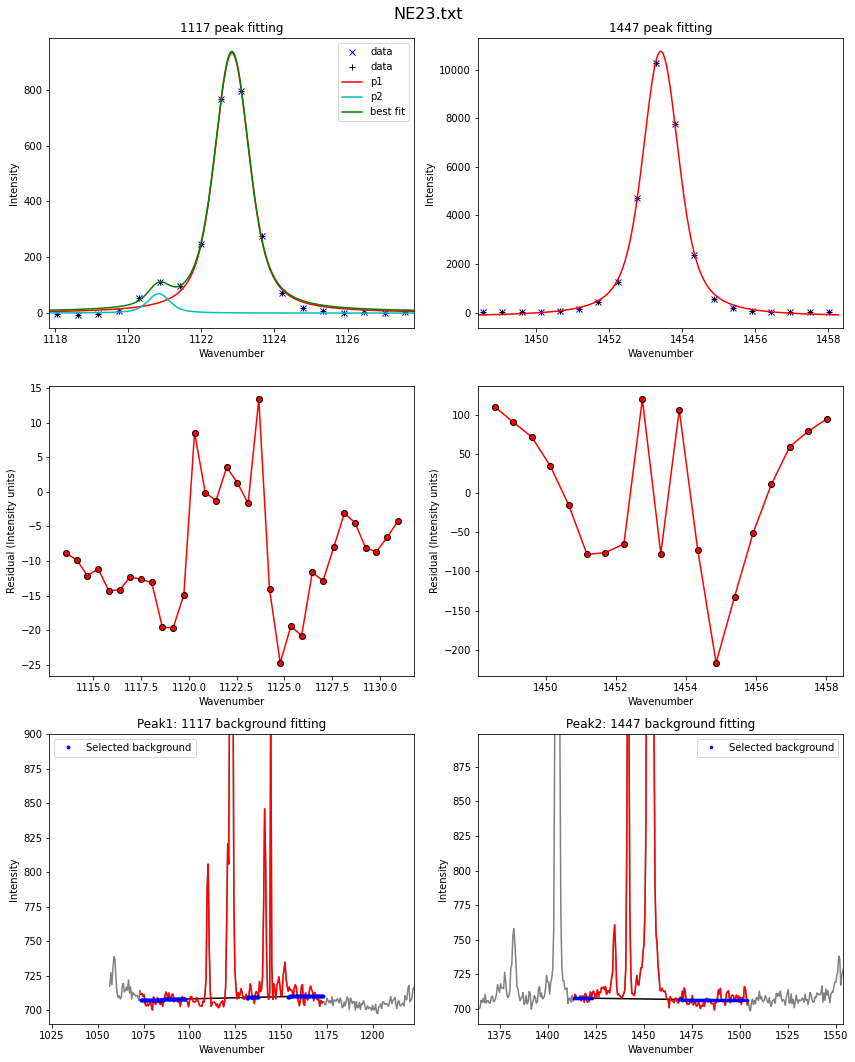

In [21]:
filename='NE23.txt'
#If you have weak Ne lines and no secondary peak, set to 1
peaks_1=2
# If weak, set to 10
LH_offset_mini=[2, 5]
# If fit really bad, try tweaking the amplitude here
amplitude=100
x_range=50
# Y range- Determins how much y axis you get above the baseline on the plot
y_range=200
# Backgrounds, relative to peak center. Adjust in function.

# To see other parameters you can tweak, do help(pf.fit_Ne_lines) if this isn't working fo your spectra. 
df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(
Ne=Ne, filename=filename, path=path, prefix=prefix,
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1,
Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
amplitude=amplitude,
x_span_1=[-10, 8],
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 15], upper_bck2_pk1=[30, 50],
N_poly_2_baseline=1, x_span_2=[-5, 5],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 51],
x_range=x_range, y_range=y_range)

df_test
